# SIMULATING QUANTUM TUNNELING: Demonstrating a Gaussian Wave Packet passing a potential barrier.

 # Discritized Hamiltonian
 $\dfrac{1}{2\text{d}x^2} \begin{pmatrix} \ \ 2 & -1 & \ & \ \\ -1 &\ \ 2 & -1 & \ \\ \ & -1 &\ \ 2 & -1 & \ \\ \ & \ & \ & \ddots \end{pmatrix} +   \begin{pmatrix} \ \ V[0] & \ & \ & \ \\ \ & V[1] & \ & \ \\ \ & \ & V[2] & \ & \ \\ \ & \ & \ & \ddots \end{pmatrix} $

 # Centered Finite Difference 
$\Delta f \approx \dfrac{f[x-\text{d}x] - 2f[x] + f[x + \text{d}x]}{\text{d}x^2}$

# Solving the finite difference scheme gives what we intend to plot
$\psi(x, t + \text{d}t) = \left(1 -   \dfrac{ \text{d}t }{2i}\,H \right)^{-1}   \left(1 + \dfrac{ \text{d}t }{2i}\,H\right)  \psi(x, t)$

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.animation as animation





class WAVE():
    def __init__(self, sigma, x_start, x_end, dx, x0, k0, height, width,dt, nt):
        #standard deviation
        self.sigma= sigma
        
        #x-intervals
        self.x_start=x_start
        self.x_end=x_end
        self.dx=dx
        
        #initialize coordinates
        self.x0=x0
        self.k0=k0
        
        #x-axis formation
        points = int((x_end -x_start)/dx)
        self.points = points
        self.x = np.linspace(x_start, x_end, points)
        
        # Gaussian Wave Packet
        self.psi = (1/((2*np.pi*sigma**2))**(1/4))*np.exp(-((self.x-x0)/(2*sigma))**2)*np.exp(1j*k0*self.x)
        
        # Gaussian Wave Packet- probabilty density
        self.prob = abs(self.psi)**2
        norm = sum(self.prob)
        self.prob /= norm
        self.psi /= norm**0.5
        
        #height for barrier
        self.height= height
        #width for barrier
        self.width = width
        
        # potential array, initially set to zero
        v = np.zeros(points)
        
        # position of poetential barrier
        mid_value = int(points/2)
        end_points = int(width/dx) +  mid_value 
        v[mid_value:end_points] = height
        self.v = v
        
        # Time evolution
        self.dt=dt
        self.nt = nt
        laplace = np.zeros((self.points, self.points))
        
        for i in range(self.points):
            #specifying the diagonal elements of the matrix
            laplace[i,i]=2
            
            if i != 0:
                laplace[i-1,i]=-1
                laplace[i,i-1]=-1
        #Hamiltonian calculation
        H = (1/(2*((self.dx)**2)) * laplace) + self.v
        
        # np.eye - Return a 2-D array with ones on the diagonal and zeros elsewhere.
        Matrix_1 = (np.eye(np.shape(H)[0])+(dt/2j)*H)
        Matrix_2 = np.linalg.inv(np.eye(np.shape(H)[0]) - dt/2j * H)
        self.Matrix_product = np.matmul(Matrix_2,Matrix_1)
        
        
    def psi(self):
        return f"{self.psi}"
    
    
   #evolves the Gaussian packet forward in time
    def evolve(self):
        for i in range(1,self.nt):
            self.psi =  np.matmul(self.Matrix_product,self.psi)
            self.prob = abs(self.psi)**2
 
            norm = sum(self.prob)
            self.prob /= norm
            self.psi /= norm**0.5
 
        return self.prob



#Animating the scenerio........
class Animator:
    def __init__(self, anim):
        
        #set initial time
        self.time = 0.0
        #anim is the parameter which will define our Wave packet
        self.anim = anim
        self.fig, self.ax = plt.subplots()
        #plotting the barrier(barrier is stationary)
        plt.plot(self.anim.x, self.anim.v, color='r')
        #self line is the plot that will progress in time
        self.line, = self.ax.plot(self.anim.x, self.anim.evolve())
        #setting up a time progression track
        self.time_text = self.ax.text(0.05, 0.95, '', horizontalalignment='left',
            verticalalignment='top', transform=self.ax.transAxes)
        #setting y limit wisely as the wave will otherwise be too small or too large to detect
        self.ax.set_ylim(0, 0.05)
        self.ax.set_xlabel('Position (m)')
        self.ax.set_ylabel('Probability density')

        #update the frames 
    def update(self, data):
        self.line.set_ydata(data)
        return self.line,
    
    def time_step(self):
         while self.time <= self.anim.nt:
        
            self.time_text.set_text(
                'Elapsed time: {:6.2f} fs'.format(self.time * 2.419e-2))
           #essentially returns the evolve function from the previous class
            yield self.anim.evolve()
            self.time = self.time + self.anim.dt
          
    def animate(self):
        
        # call the animator.  blit=True means only re-draw the parts that have changed.
        #class matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
        self.ani = animation.FuncAnimation(self.fig, self.update, self.time_step,
                               interval=20, blit=False)
        f = "Tunnel.gif"
        writergif = animation.PillowWriter(fps=30) 
        self.ani.save(f, writer=writergif)
        #save the animation

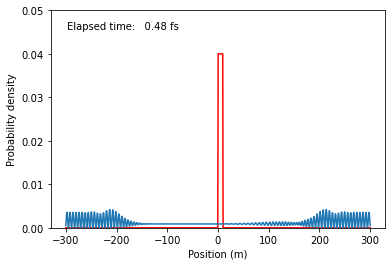

In [2]:
anim = WAVE(sigma=5, x_start=-300, x_end=300, dx=0.75, x0=-250, k0=1,height= 0.04, width=10, dt=0.5, nt=20)
animator = Animator(anim)
animator.animate()
plt.show()

References:
https://physicspython.wordpress.com/2019/08/31/quantum-tunneling-part-1/
https://physicspython.wordpress.com/2019/10/04/quantum-tunneling-part-2/
https://physicspython.wordpress.com/2019/10/27/quantum-tunneling-part-3/
